In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, median_absolute_error, r2_score

In [2]:
%matplotlib inline

## Salary Position Data

In [3]:
data = pd.read_csv('../input/Position_Salaries.csv')
data.head(2)

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000


In [4]:
x = np.array(data['Level']).reshape(-1, 1)
y = data['Salary']
x_else = np.arange(min(x), max(x), 0.01).reshape(-1, 1)

## Decision Tree Regressor

In [5]:
dtregressor = DecisionTreeRegressor()
dtregressor.fit(x, y)
salary_predicted = dtregressor.predict(x_else)

Text(0.5, 1.0, 'Position vs Salary')

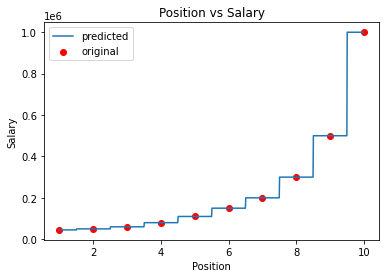

In [6]:
plt.figure()
plt.scatter(data['Level'], data['Salary'], color='red', label='original')
plt.plot(x_else, salary_predicted, label='predicted')
plt.xlabel('Position')
plt.ylabel('Salary')
plt.legend()
plt.title('Position vs Salary')

In [7]:
r2_score(y, dtregressor.predict(x))

1.0

##  Random Forest Regressor

In [8]:
rfregressor = RandomForestRegressor(n_estimators=20, random_state=0)
rfregressor.fit(x, y)
salary_predicted = rfregressor.predict(x_else)

Text(0.5, 1.0, 'Position vs Salary')

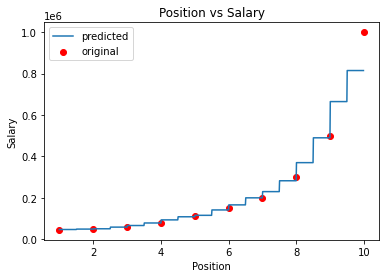

In [9]:
plt.figure()
plt.scatter(data['Level'], data['Salary'], color='red', label='original')
plt.plot(x_else, salary_predicted, label='predicted')
plt.xlabel('Position')
plt.ylabel('Salary')
plt.legend()
plt.title('Position vs Salary')

In [10]:
r2_score(y, rfregressor.predict(x))

0.9569622097077629

## US Data

In [11]:
data = pd.read_csv('../input/us.csv')
data.head(2)

,Day,cases,deaths
0,1,1,0
1,2,1,0


In [12]:
x = np.array(data['cases']).reshape(-1, 1)
x_else = np.arange(min(data['cases']), max(data['cases']), 5).reshape(-1, 1)

## Decision Tree

In [13]:
dtregressor = DecisionTreeRegressor()
dtregressor.fit(x, data['deaths'])

deaths_predicted = dtregressor.predict(x_else)

Text(0.5, 1.0, 'Cases vs Deaths')

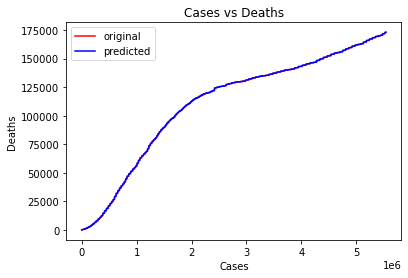

In [14]:
plt.figure()
plt.plot(data['cases'], data['deaths'], color='red', label='original')
plt.plot(x_else, deaths_predicted, label='predicted', color = 'blue')
plt.xlabel('Cases')
plt.ylabel('Deaths')
plt.legend()
plt.title('Cases vs Deaths')

In [15]:
r2_score(data['deaths'], dtregressor.predict(x))

1.0

## Random Forest

In [16]:
rfregressor = RandomForestRegressor(n_estimators=20, random_state=0)
rfregressor.fit(x, data['deaths'])
deaths_predicted = rfregressor.predict(x_else)

Text(0.5, 1.0, 'Cases vs Deaths')

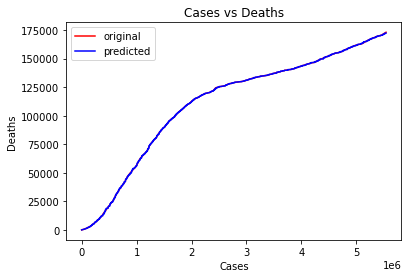

In [17]:
plt.figure()
plt.plot(data['cases'], data['deaths'], color='red', label='original')
plt.plot(x_else, deaths_predicted, label='predicted', color = 'blue')
plt.xlabel('Cases')
plt.ylabel('Deaths')
plt.legend()
plt.title('Cases vs Deaths')

In [18]:
r2_score(data['deaths'], rfregressor.predict(x))

0.9999825564755866